# Imports

In [ ]:
# !pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/uplift-modeling")
# https://www.kaggle.com/datasets/arashnic/uplift-modeling

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criteo AI Lab Dataset

* f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11: feature values (dense, float)
* treatment: treatment group (1 = treated, 0 = control)
* conversion: whether a conversion occured for this user (binary, label)
* visit: whether a visit occured for this user (binary, label)
* exposure: treatment effect, whether the user has been effectively exposed (binary)

## Uplift Model

# EDA

In [ ]:
df=pd.read_csv("Data/criteo-uplift-v2.1.csv")

In [4]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [7]:
df["treatment"].value_counts()

treatment
1    11882655
0     2096937
Name: count, dtype: int64

Checking for feature imbalance

In [8]:
df[df["treatment"]==1].describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,1.188266e+07,11882655.0,1.188266e+07,1.188266e+07,1.188266e+07
mean,1.961476e+01,1.007034e+01,8.446302e+00,4.169412e+00,1.033925e+01,4.026602e+00,-4.182792e+00,5.105555e+00,3.933392e+00,1.605259e+01,5.333660e+00,-1.709848e-01,1.0,3.089461e-03,4.854336e-02,3.603673e-02
std,5.375564e+00,1.066934e-01,2.990746e-01,1.352432e+00,3.441166e-01,4.370446e-01,4.600940e+00,1.212461e+00,5.686911e-02,7.056251e+00,1.688467e-01,2.289462e-02,0.0,5.549700e-02,2.149114e-01,1.863816e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.376438e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.191727e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.442561e+01,1.005965e+01,8.720795e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.036660e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df[df["treatment"]==0].describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2.096937e+06,2096937.0,2.096937e+06,2.096937e+06,2096937.0
mean,1.965170e+01,1.006794e+01,8.448173e+00,4.232821e+00,1.033653e+01,4.039339e+00,-3.999880e+00,5.080284e+00,3.934652e+00,1.588625e+01,5.331898e+00,-1.708677e-01,0.0,1.937588e-03,3.820096e-02,0.0
std,5.388112e+00,9.298990e-02,3.006762e-01,1.242029e+00,3.386814e-01,3.955382e-01,4.441985e+00,1.163292e+00,5.544518e-02,6.802162e+00,1.646757e-01,2.247879e-02,0.0,4.397539e-02,1.916811e-01,0.0
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-7.815454e+00,-2.930620e+01,4.833815e+00,3.640503e+00,1.319006e+01,5.300375e+00,-1.329638e+00,0.0,0.000000e+00,0.000000e+00,0.0
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.359690e+00,4.833815e+00,3.915574e+00,1.319006e+01,5.300375e+00,-1.686792e-01,0.0,0.000000e+00,0.000000e+00,0.0
50%,2.195963e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,0.0,0.000000e+00,0.000000e+00,0.0
75%,2.449624e+01,1.005965e+01,8.731431e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,0.0,0.000000e+00,0.000000e+00,0.0
max,2.674526e+01,1.560040e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199839e+01,3.971858e+00,6.772867e+01,6.473914e+00,-1.686792e-01,0.0,1.000000e+00,1.000000e+00,0.0


Finding correlations

potential bias:
f9     8.426524
f6     7.133638
f0     3.848126
f3     2.881347
f7     1.047835
f5     0.570762
f4     0.312714
f1     0.114475
f10    0.099097
f8     0.066906
f11    0.017431
f2     0.008316
Name: diff, dtype: float64


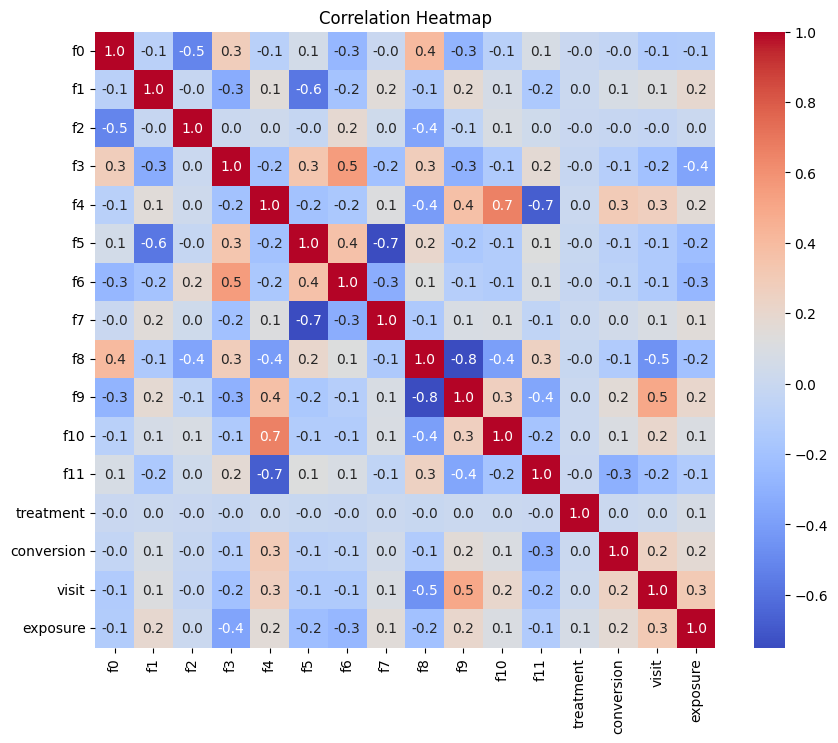

In [25]:
features = [f'f{i}' for i in range(12)]
# comparing means of treatment vs control
stats = df.groupby('exposure')[features].mean().T
stats['diff'] = (stats[1] - stats[0]).abs()
print("potential bias:")
print(stats['diff'].sort_values(ascending=False))

# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()



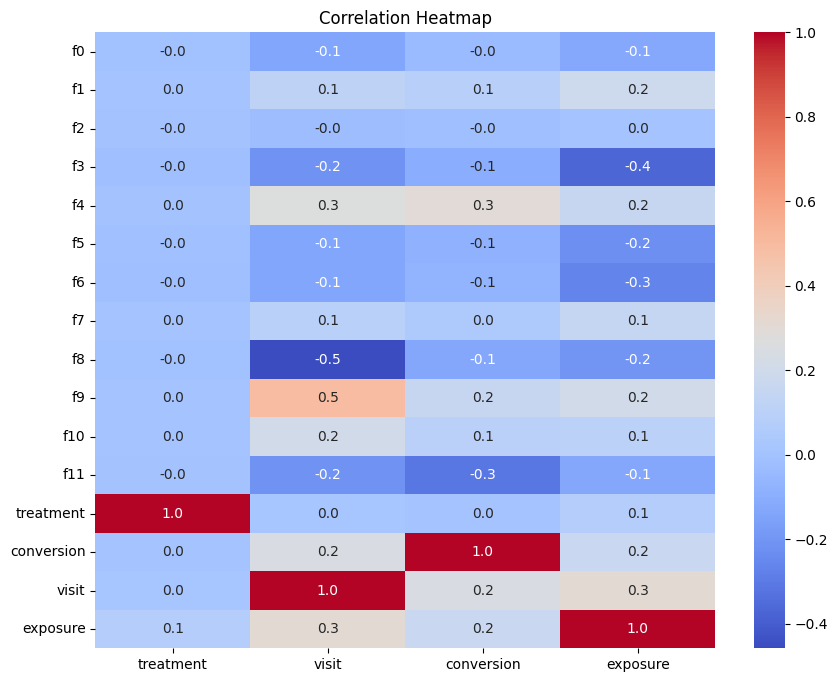

In [26]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr[['treatment','visit', 'conversion', 'exposure']], annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
corr

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
f0,1.000000,-0.086022,-0.514555,0.280570,-0.093442,0.053413,-0.270590,-0.000088,0.404888,-0.291799,-0.091798,0.078254,-0.002454,-0.037973,-0.134034,-0.123310
f1,-0.086022,1.000000,-0.012844,-0.329413,0.149221,-0.574309,-0.192257,0.151326,-0.143599,0.174166,0.069124,-0.150227,0.008185,0.083103,0.112029,0.188304
f2,-0.514555,-0.012844,1.000000,0.006777,0.024577,-0.022430,0.183739,0.035471,-0.372912,-0.051673,0.088896,0.030912,-0.002233,-0.014175,-0.030331,0.004787
f3,0.280570,-0.329413,0.006777,1.000000,-0.199666,0.334220,0.549706,-0.204964,0.282054,-0.303108,-0.135873,0.171959,-0.016939,-0.104222,-0.207821,-0.371455
f4,-0.093442,0.149221,0.024577,-0.199666,1.000000,-0.197011,-0.159261,0.112939,-0.409904,0.364326,0.658277,-0.677701,0.002829,0.298634,0.267452,0.156960
f5,0.053413,-0.574309,-0.022430,0.334220,-0.197011,1.000000,0.362113,-0.746508,0.201885,-0.159930,-0.126846,0.122037,-0.010549,-0.086751,-0.138319,-0.228143
f6,-0.270590,-0.192257,0.183739,0.549706,-0.159261,0.362113,1.000000,-0.323578,0.118972,-0.106988,-0.123118,0.089329,-0.014267,-0.071954,-0.137480,-0.268516
f7,-0.000088,0.151326,0.035471,-0.204964,0.112939,-0.746508,-0.323578,1.000000,-0.143521,0.087290,0.095967,-0.050098,0.007487,0.043745,0.091858,0.149811
f8,0.404888,-0.143599,-0.372912,0.282054,-0.409904,0.201885,0.118972,-0.143521,1.000000,-0.750324,-0.401546,0.253150,-0.007940,-0.130566,-0.457967,-0.203478
f9,-0.291799,0.174166,-0.051673,-0.303108,0.364326,-0.159930,-0.106988,0.087290,-0.750324,1.000000,0.267429,-0.362990,0.008462,0.156245,0.495268,0.206872


* treatment has near 0 correlations so no features had a dependency on the experiment
* features f4 and f9 seem to likely influence visits and conversion
* * f11 seems to influnce no conversion with negative correlation
* high +/- correlation between f8 and f9, f5 and f7, f4 and f10/f11

In [18]:

# Compare Conversion Rates
conversion_rates = df.groupby('exposure')['conversion'].mean()
print(f"Control: {conversion_rates[0]:.4%}")
print(f"Treatment: {conversion_rates[1]:.4%}")
print(f"Raw Lift: {conversion_rates[1] - conversion_rates[0]:.4%}")

Control: 0.1309%
Treatment: 5.3784%
Raw Lift: 5.2475%
